# Model Building for Classification 

In this section, we will build machine learning models to predict whether an individual has an earning of over 50k. We will then compare the models, choose a final model, and interpret the results. Here is the agenda:

### Table of Contents ###
> **[Import Data and Libraries](#1)**
 
> **[Prepare Dataset in correct format](#2)**

> **[Evaluate Algorithms](#3)**

> **[Interpret Results](#4)**

## <a id="1"></a> Import Data and Libraries

In [42]:
import pandas as pd
data = pd.read_csv("output.csv")
data.head()

,id,age,workclass,education_level,education_num,marital_status,occupations,relationships,race,sex,country,capital_gain,capital_loss,hours_week,over_50k
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,2174,0,40,0
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0,0,13,0
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0,0,40,0
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0,0,40,0
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0,0,40,0


In [44]:
# Load libraries
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## <a id="2"></a>Prepare Dataset in correct format

Since Python's sklearn library only takes numeric input to the dataset, we must convert all categorical features into dummy variables of *one hot encoding*. 

In [45]:
# one hot encoding of the following categorical variables:
cols = ['sex', 'race', 'workclass', 'country', 'marital_status', 'relationships', 'occupations'] 

# this returns a new dataframe with prefix _is for one hot encodings
df = pd.get_dummies(data, columns = cols, prefix='is_', drop_first = True)
df.head()

,id,age,education_level,education_num,capital_gain,capital_loss,hours_week,over_50k,is__Male,is__Asian-Pac-Islander,...,is__Farming-fishing,is__Handlers-cleaners,is__Machine-op-inspct,is__Other-service,is__Priv-house-serv,is__Prof-specialty,is__Protective-serv,is__Sales,is__Tech-support,is__Transport-moving
0,1,39,Bachelors,13,2174,0,40,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,50,Bachelors,13,0,0,13,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,38,HS-grad,9,0,0,40,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,53,11th,7,0,0,40,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,28,Bachelors,13,0,0,40,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


I observed that there is Perfect Collinearity between education level and education number, and they are representing the exact same things, one in strings and one in numbers (see result below). This led me to drop education level and use eduation level as a continuous variable.

In [4]:
pd.crosstab(index=data['education_level'],  columns=data['education_num'])

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education_level,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


In [46]:
Y = df['over_50k']  # our target variable
X = df.drop(['id','over_50k', 'education_level'], axis=1)  # the isolated data set

In [47]:
# Split data into training and testing
validation_size = 0.20 
seed = 7
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## <a id="3"></a>Evaluate Algorithms

In [48]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring = 'accuracy' 

# Spot Check Algorithms 
models = []  
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))   # After running the support vector machine classifier, I decided to omit it, as it
                                # wasn't performing well in accuracy and time complexity  

We will evaluate each models' performance by measuring its classification accuracy. In the code below, we perform a 10-fold cross validation and observe each fold's classification accuracy. 

In [49]:
# evaluate each model in turn
results = []
names = []
print "Classifier: Average Classification Rate (Standard Deviation)"
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Classifier: Average Classification Rate (Standard Deviation)
LR: 0.852302 (0.005048)
LDA: 0.842193 (0.006151)
KNN: 0.847567 (0.004769)
CART: 0.821923 (0.005704)
NB: 0.823024 (0.005440)


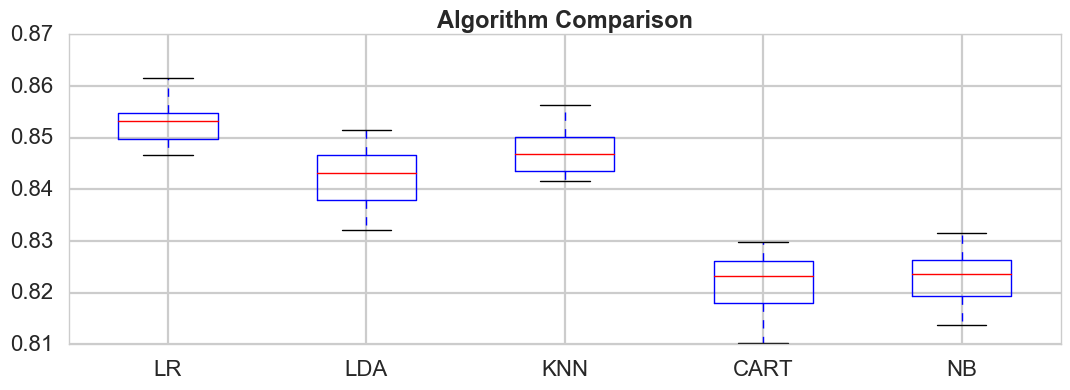

In [88]:
# Compare Algorithms
fig = plt.figure()
ax = fig.add_subplot(211) 
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_title('Algorithm Comparison', weight = 'bold', fontsize = 17)
plt.show()

It seems Logistic regression is the best performing algorithm on this dataset. The average classification rate is the highest and the variability is the lowest amongst all tested classifiers. Therefore, we will fit a Logistic Regression, perform prediction on the test set, and examine its results. 

In [116]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)  # Fit the model on training 
predictions = LR.predict(X_test) # Predict on Test Data
print "Accuracy on the test set is: ", accuracy_score(Y_test, predictions)

Accuracy on the test set is:  0.845019961101


We achieved an accuracy of .845 on the test set, which is comparable to an average .852 accuracy on cross validation. However, accuracy is not *necessarily* an indicator of a good model. For our data, we have 76% of our data being under 50k, so if we predicted everyone to be under 50k, we would still be right 76% of the time. We must look at a confusion matrix to see how our predictions did in each of the classes.

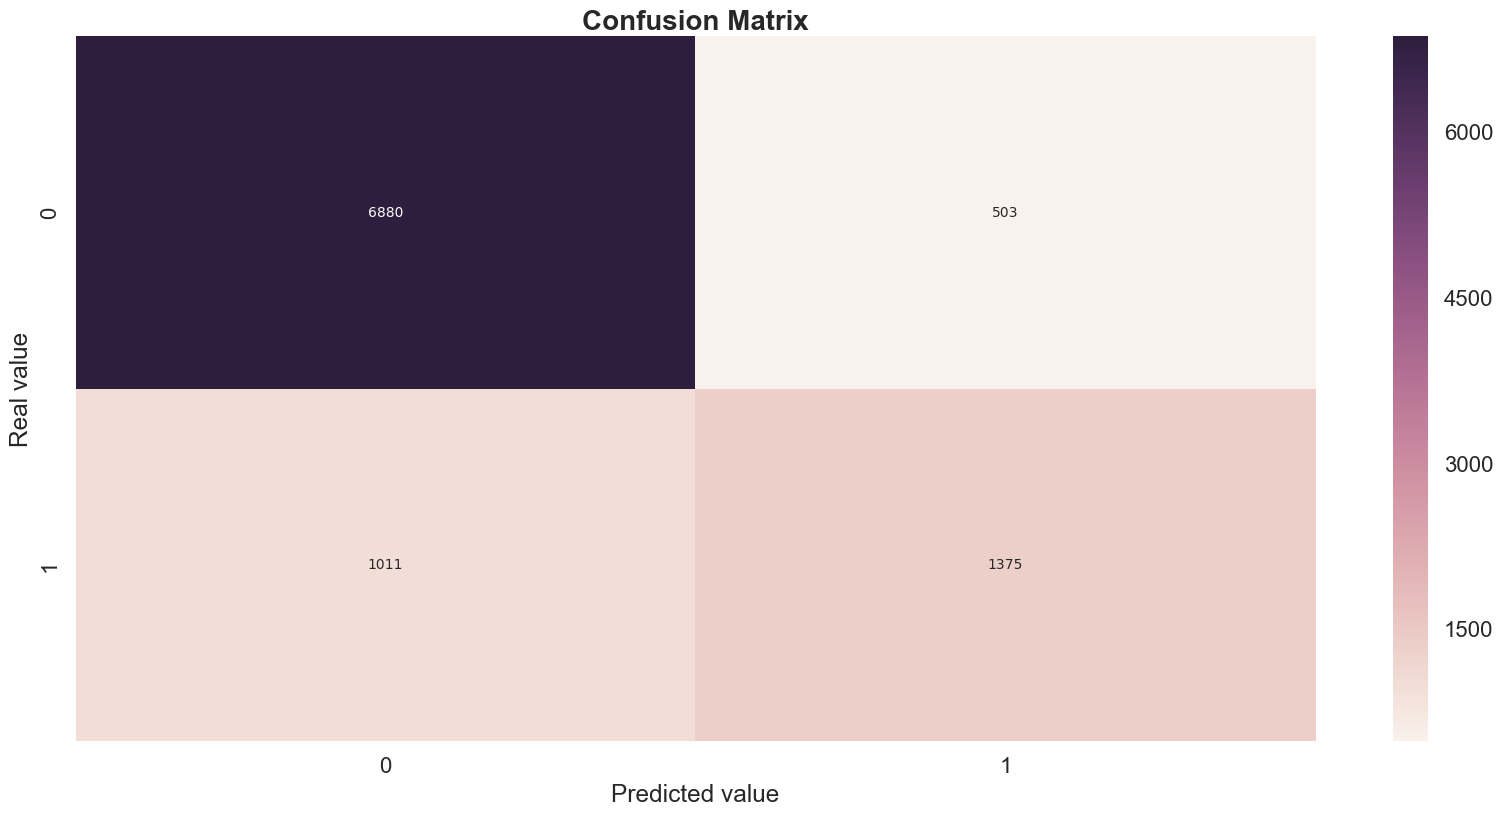

In [102]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
cm = confusion_matrix(Y_test, predictions)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix', fontsize = 20, weight = 'bold')
plt.ylabel("Real value");
plt.xlabel("Predicted value");

In [24]:
print classification_report(Y_test, predictions)

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      7383
          1       0.73      0.58      0.64      2386

avg / total       0.84      0.85      0.84      9769



**Precision** is a measure of how many Predicted in each class were actually in that class.

**Recall** is a measure of the percentage in each class we were able to guess correctly. 

We see that while we generally had a high precision and recall, we did not have a strong recall of positive cases (over 50k). Only 58% of those over 50k were retrieved; the 42% others were labeled as not being over 50k. 

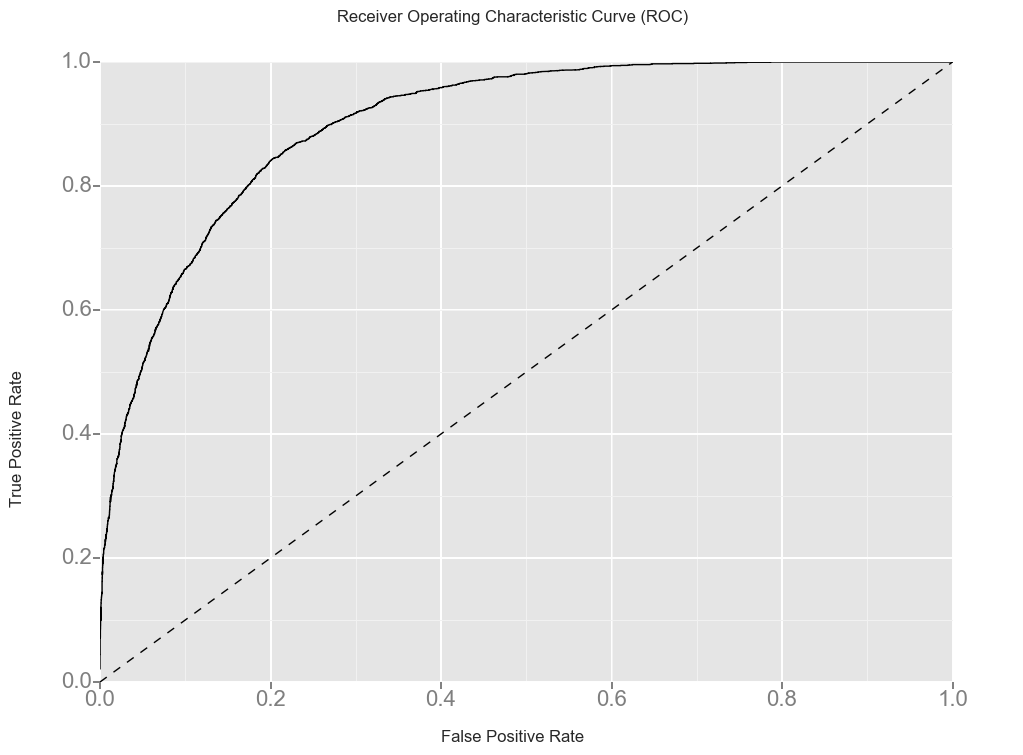

<ggplot: (291888821)>

In [201]:
from ggplot import *
from sklearn import metrics
preds = LR.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    xlab('False Positive Rate') + ylab('True Positive Rate') +\
    ggtitle('Receiver Operating Characteristic Curve (ROC)') +\
    geom_abline(linetype='dashed')

In [197]:
auc = metrics.auc(fpr,tpr)
auc

0.90188142057164689

Another measure of performance of our algorithm is the area under curve for the ROC curve. The diagonal line is a baseline of random guessing. With a score of .902 we have a score that is close to 1. Depending on how important we weigh predicting one class over another, we can vary the treshold of our logistic regression model to recall a higher percentage of that class.

## <a id="4"></a>Interpret Results

The logistic regression gives us a linear combination of predictors that model the odds of the event happening to the event not happening. By exponentiating the coefficients, we are able to obtain the odds of having over 50k.

For categorical variables, having that feature yields a change in odds by exp(coefficient) compared to not having that feature. 

For continous variables, (holding other variables constant), for one unit increase of that variable, we expect odds to increase by exp(coefficient). 

Enough talk. Let's visualize the results below! 

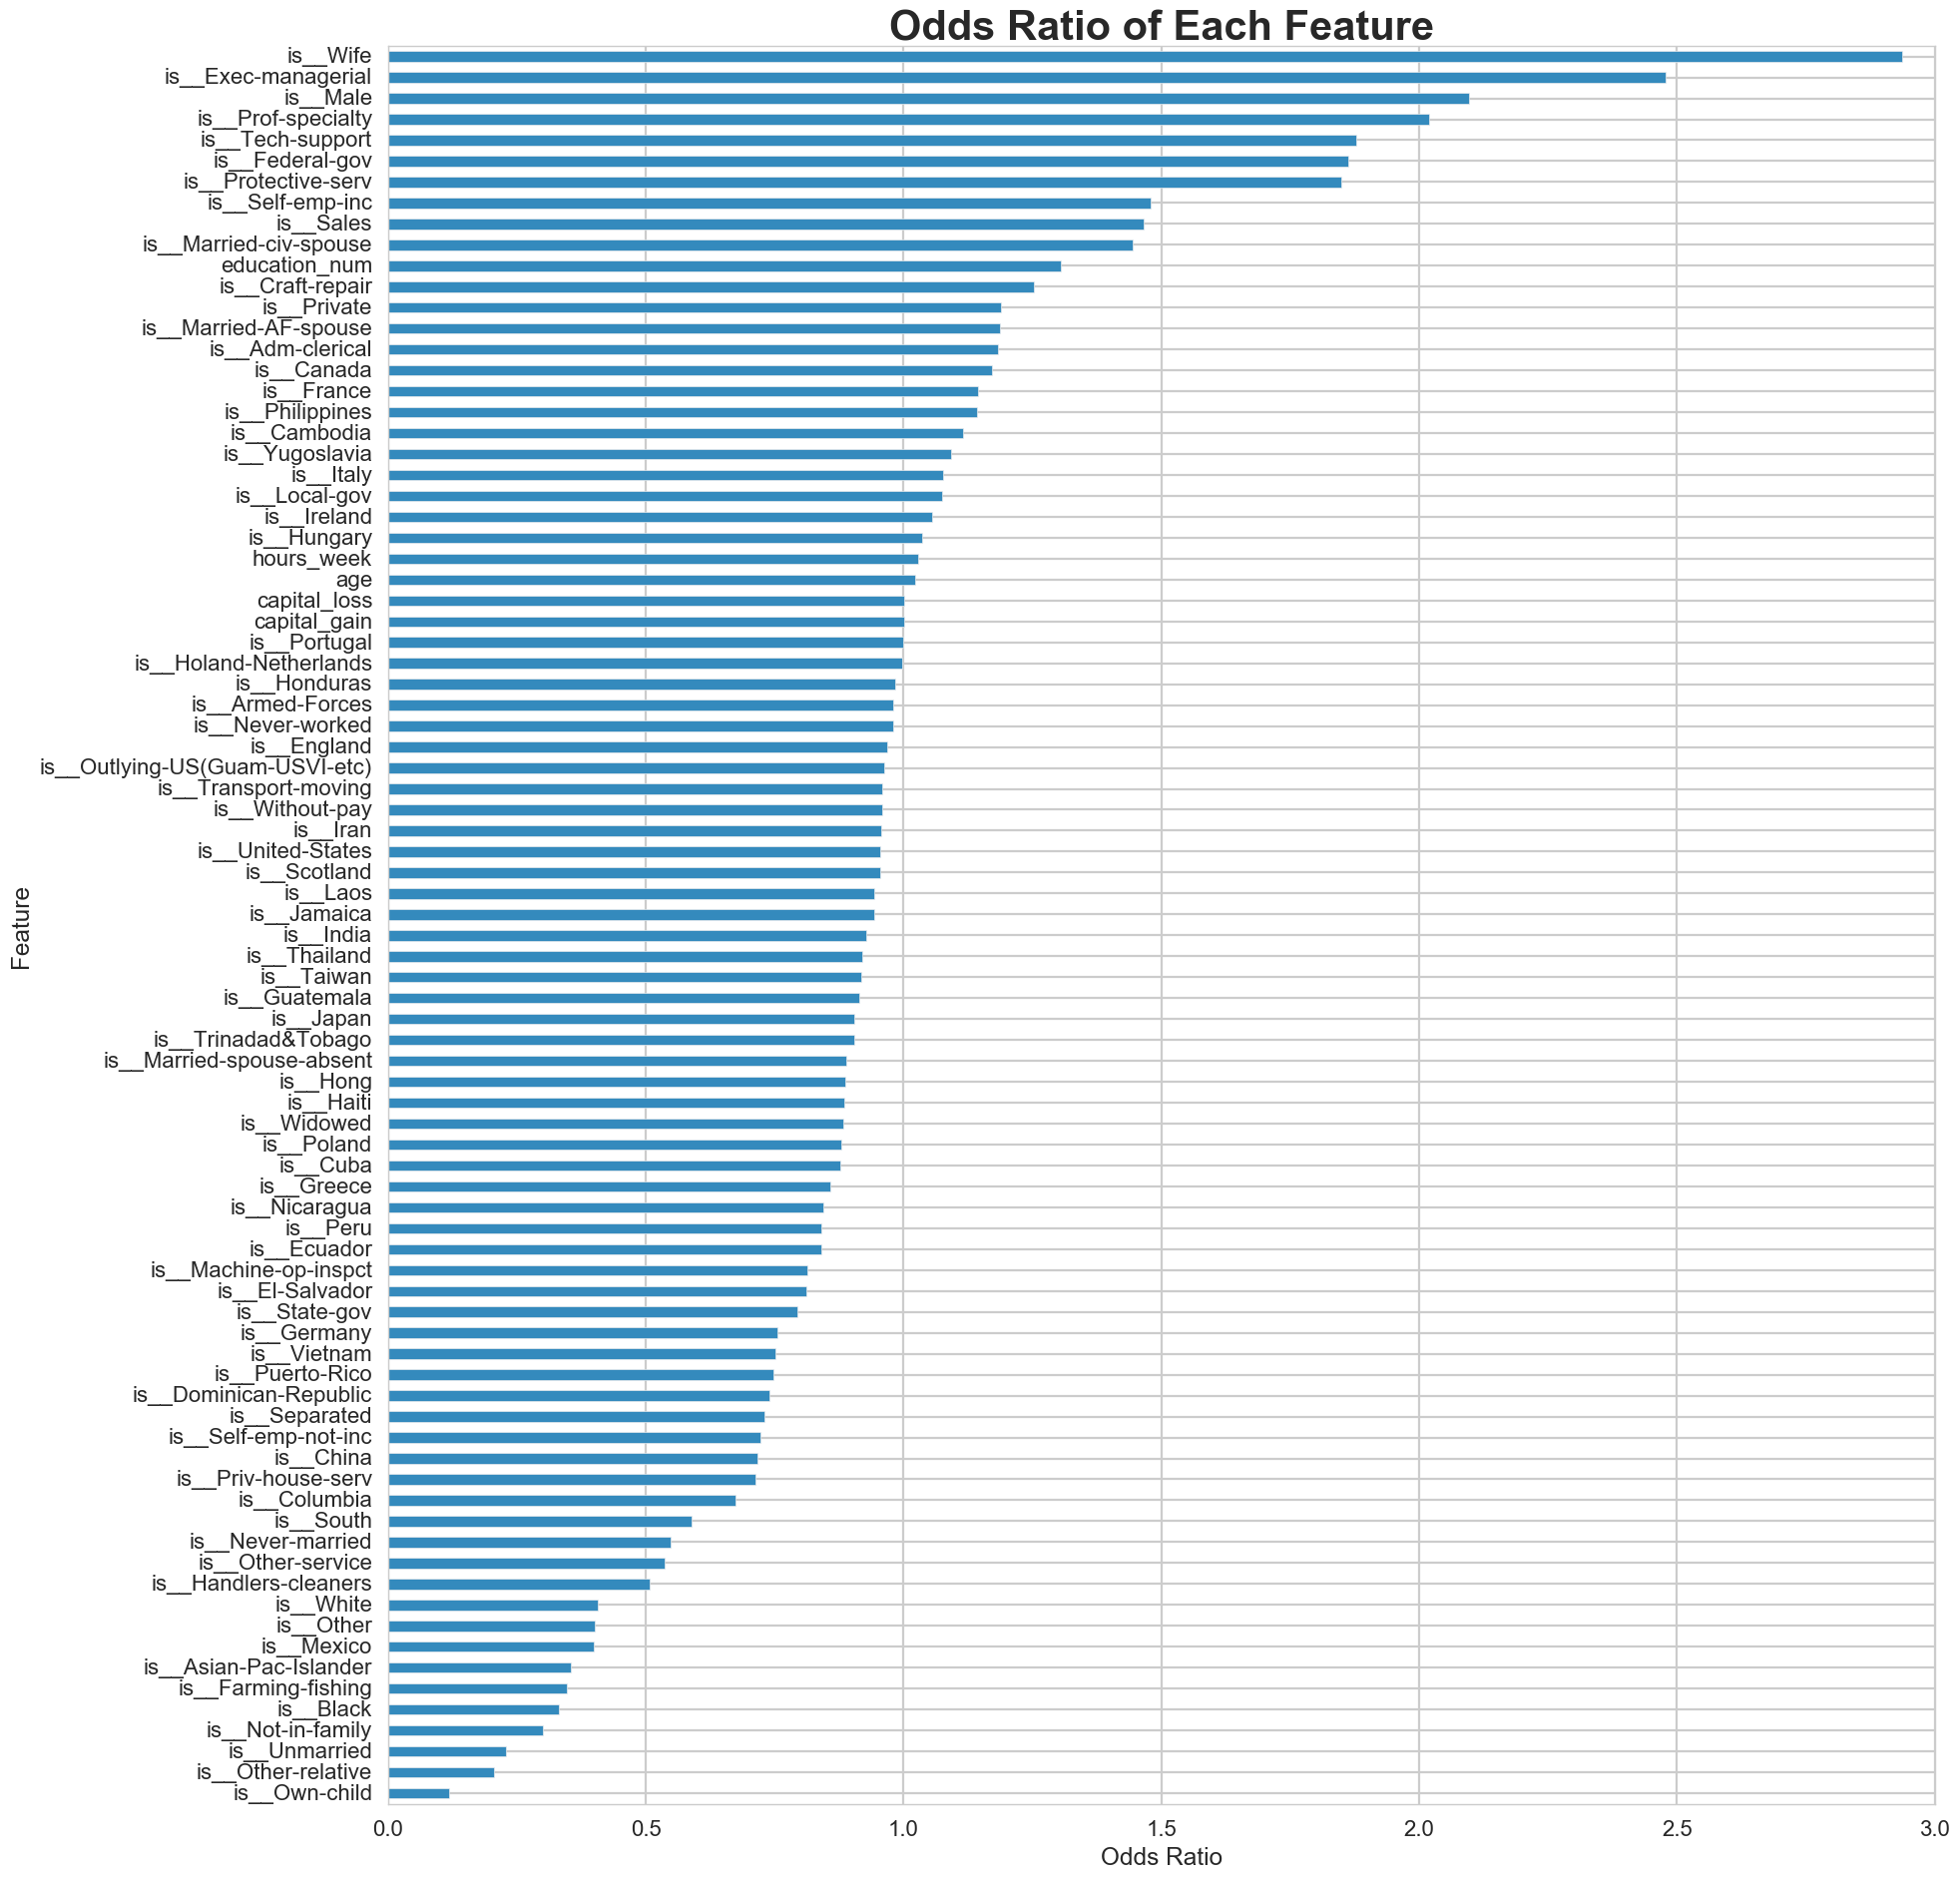

In [204]:
import numpy as np
coefs = pd.Series(np.exp(LR.coef_[0]), index=X_train.columns)  # exponentiated coefficients give odds ratio of over 50k
coefs.sort(ascending = True) # sort the odds ratio in descending order
ax = plt.subplot(2,1,2)
coefs.plot(kind="barh", figsize = (20,50)) # horizontal bar plot
ax.set_title('Odds Ratio of Each Feature', fontsize = 30, weight = 'bold')
ax.set_ylabel('Feature')
ax.set_xlabel('Odds Ratio')
plt.show()

Let's look at the variables that yield the top 10 and bottom 10 odds

In [206]:
print "Feature" + " "*19 + "Largest Odds of Having Over 50k"
print pd.Series(np.exp(LR.coef_[0]), index=X_train.columns).sort_values(ascending = False).head(10)
print "\nFeature" + " "*19 + "Largest Odds of Having Under 50k"
print pd.Series(np.exp(LR.coef_[0]), index=X_train.columns).sort_values(ascending = True).head(10).apply(lambda x: 1/x)

Feature                   Largest Odds of Having Over 50k
is__Wife                  2.935910
is__Exec-managerial       2.477064
is__Male                  2.096107
is__Prof-specialty        2.019798
is__Tech-support          1.878790
is__Federal-gov           1.863330
is__Protective-serv       1.848732
is__Self-emp-inc          1.478348
is__Sales                 1.466012
is__Married-civ-spouse    1.443837
dtype: float64

Feature                   Largest Odds of Having Under 50k
is__Own-child             8.480657
is__Other-relative        4.873029
is__Unmarried             4.360218
is__Not-in-family         3.338298
is__Black                 3.014672
is__Farming-fishing       2.883267
is__Asian-Pac-Islander    2.817424
is__Mexico                2.505966
is__Other                 2.490430
is__White                 2.456859
dtype: float64


The most predictive features are the ones with the *largest odds*. Large numbers mean demonstration of that feature (for example, is_Wife means one is a wife) gives one a high likelihood of being in one class over the other. On the other hand, features with odds close to one are the least informative, because it is difficult to categorize individuals based on them. 

From the graph above, I pulled the ten top features (large odds of being over 50k) and ten bottom features (large odds of being under 50k). The top ten smallest odds less than one were inverted to represent the odd of the non-event. 

The most informative features were one's relationship status and occupation. They comprised 14 out of the top 20 most informative features. Those married with 'white collar' occupations have a huge advantage. Those who own children, are unmarried, and are in 'blue collar' occupations had a huge disadvantage.